In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


data = pd.read_csv('sunspot.txt',  header=None, delim_whitespace=True)
del data[0] ## Deletes the "year" column
#data = data.rename(columns={1: 'jan', 2: 'feb', 3: 'mar', 4:'apr',
                     #5:'may', 6:'june', 7:'july', 8:'aug',
                     #9:'sept', 10:'oct', 11:'nov', 12:'dec'})
data = data.sort_index(ascending=True)
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12
0,58.0,62.6,70.0,55.7,85.0,83.5,94.8,66.3,75.9,75.5,158.6,85.2
1,73.3,75.9,89.2,88.3,90.0,100.0,85.4,103.0,91.2,65.7,63.3,75.4
2,70.0,43.5,45.3,56.4,60.7,50.7,66.3,59.8,23.5,23.2,28.5,44.0
3,35.0,50.0,71.0,59.3,59.7,39.6,78.4,29.3,27.1,46.6,37.6,40.0
4,44.0,32.0,45.7,38.0,36.0,31.7,22.0,39.0,28.0,25.0,20.0,6.7


In [2]:
label_index = 0
i = 1
j = 9

labels_array = np.array([])

while i < 266:
    labels_array = np.append(labels_array,data.iloc[i][j].tolist())
    label_index+=1
    j+=1
    if(j>12):
        j=1
        i+=1

labels_full = pd.DataFrame(labels_array)
print(labels_full.shape)
labels_full.head()

(3172, 1)


,0
0,91.2
1,65.7
2,63.3
3,75.4
4,70.0


In [3]:
i = 0
j = 1
i_start = 0
j_start = 1
count_r = 0
count_c = 0
data_test_set = []

while count_r < 3172:
    data_row = np.array([])
    count_c = 0
    j = j_start
    i = i_start
    
    while count_c < 20:
        count_c+=1
        data_row = np.append(data_row, data.iloc[i][j].tolist())
        j+=1
        if(j>12):
            j=1
            i+=1
            
    j_start+=1
    if j_start > 12:
        j_start = 1
        i_start+=1
    data_test_set.append(data_row)
    count_r+=1
    
data_full_df = pd.DataFrame(data_test_set)

In [4]:
columns = data_full_df.columns.tolist()
columns = columns[::-1]
data_full_df = data_full_df[columns]
data_full_df.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
print(data_full_df.shape)
data_full_df.head()

(3172, 20)


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6,58.0
1,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0,62.6
2,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7,70.0
3,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0,55.7
4,75.4,63.3,65.7,91.2,103.0,85.4,100.0,90.0,88.3,89.2,75.9,73.3,85.2,158.6,75.5,75.9,66.3,94.8,83.5,85.0


In [5]:
data_train_df = data_full_df.iloc[:3112][:].copy()
data_test_df = data_full_df.iloc[3132:][:].copy()
labels_train_df = labels_full[:3112].copy()
labels_test_df = labels_full[3132:].copy()

data_train_df.insert(loc=0, column=0, value=1)
data_test_df.insert(loc=0, column=0, value=1)
data_test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
3132,1,50.6,43.8,37.0,41.5,54.4,55.8,29.6,18.8,14.4,...,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3,18.8,13.2
3133,1,78.0,50.6,43.8,37.0,41.5,54.4,55.8,29.6,18.8,...,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3,18.8
3134,1,88.0,78.0,50.6,43.8,37.0,41.5,54.4,55.8,29.6,...,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0,15.3
3135,1,96.7,88.0,78.0,50.6,43.8,37.0,41.5,54.4,55.8,...,18.8,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7,8.0
3136,1,73.0,96.7,88.0,78.0,50.6,43.8,37.0,41.5,54.4,...,29.6,18.8,14.4,21.5,23.5,25.2,19.6,16.1,13.6,8.7


In [6]:
labels_train_df.tail()

,0
3107,0.0
3108,4.3
3109,4.8
3110,4.1
3111,10.8


In [7]:
labels_full[3132:].head()

,0
3132,78.0
3133,88.0
3134,96.7
3135,73.0
3136,58.3


In [8]:
# Normal Equation (theta that minimze COST FUNCTION MSE):
theta_best = np.linalg.inv(data_train_df.T.dot(data_train_df)).dot(data_train_df.T).dot(labels_train_df.values)
theta_best

array([[ 3.40753279e+00],
       [ 5.42742346e-01],
       [ 9.36178958e-02],
       [ 1.01431739e-01],
       [ 8.66568705e-02],
       [ 3.81649881e-02],
       [ 6.33077050e-02],
       [ 8.09135445e-04],
       [ 2.78924119e-02],
       [ 9.55003770e-02],
       [ 2.07517303e-02],
       [ 2.67433309e-02],
       [ 5.34725403e-03],
       [-3.01700873e-02],
       [ 2.73501594e-02],
       [ 1.32974778e-02],
       [-4.66236520e-02],
       [-5.55622599e-04],
       [-7.26082436e-02],
       [-7.74804120e-03],
       [-5.20224438e-02]])

In [9]:
# Predicting using the trained parameter theta_best:
y_hat = data_test_df.dot(theta_best)
y_hat.head()

,0
3132,48.738167
3133,64.494459
3134,74.748914
3135,86.448831
3136,78.455903


In [10]:
labels_test_df.head()

,0
3132,78.0
3133,88.0
3134,96.7
3135,73.0
3136,58.3


In [11]:
import math
error_rmse = np.sqrt(np.mean((labels_test_df.values - y_hat)**2))
float(error_rmse)


16.492937783757835

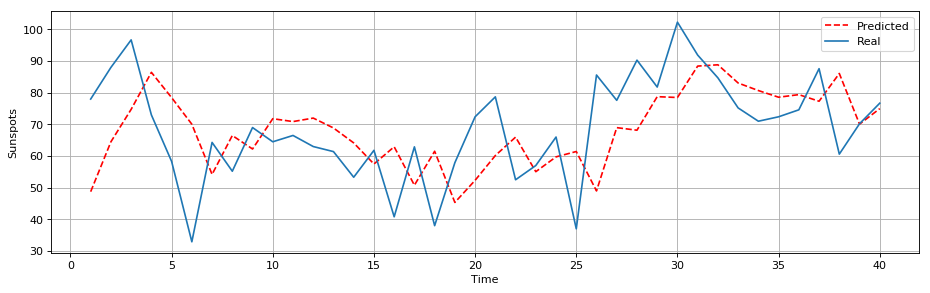

In [12]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(14, 4), dpi=80, facecolor='w', edgecolor='k')
#data_test_df.hist(bins=50, figsize=(20,13))
x = np.linspace(1, 40,num=40)
plt.plot(x,y_hat.values,'--r',label='Test')
plt.plot(x,labels_test_df.values,'-')
plt.grid(True)
plt.gca().legend(('Predicted','Real'))
plt.xlabel('Time')
plt.ylabel('Sunspots')

plt.show()

In [301]:
import random
k = 4 # Número de pastas k-fold
kfolds = []
indexes = list(range(3112))
seed = 42
subset_size = round(len(indexes) / k)
random.Random(seed).shuffle(indexes)
subsets = [indexes[x:x+subset_size] for x in range(0,len(indexes),subset_size)]
subsets

for i in range(k):
    test = subsets[i]
    train = []
    for subset in subsets:
        if subset != test:
            train.append(subset)
    kfolds.append((train, test)) # Cria tupla kfolds

In [302]:
#identity matrix
I = np.identity(20)
I[0][0] = 0
I_df = pd.DataFrame(I)

In [319]:
min_rmse_indexes = [] # Lista que armazena as variáveis de entrada que vão saindo sequencialmente
min_rmse_values = [] # Lista que armazena todos os valores do RMSE médio na medida que as variáveis de entrada vão saindo
lambda_values = [] # Lista que armazena os valores do hiperparâmetro Lambda que minimizaram a RMSE média

data_wrapper = data_full_df.iloc[:3112][:].copy() # Copia os primeiros 3112 (conjunto de treinamento) padrões do dataset 
data_wrapper.columns = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20] # Força
labels_wrapper = labels_full.copy() # Cria uma cópia de y (dados c/ labels)

N = 20 # Número de variaveis de entrada
lambdas = [1000, 10000, 15000, 50000] # Hiperparâmetro Lambda


print('(RMSE médio dos k folds, Variável Correspondente, Lambda Correspondente)')
while (N > 0):
    
    errors = [] # Reseta o vetor errors
    
    for column in data_wrapper:   
        best_data_wrapper = data_wrapper.copy() # Cria uma cópia do dataset data_wrapper 
        best_data_wrapper = best_data_wrapper.drop(column, axis=1) # Retira a coluna da interação
        best_data_wrapper.insert(loc=0, column=0, value=1) # Adiciona a coluna de 1s
        
        for lambd in lambdas:
            errors_array = []
            for num_fold in range(k):
                #print('Interação', num_fold ,'do kfold')
                indices = []
                indices_val = []

                for lists in kfolds[num_fold][0]:
                    for x in lists:
                        indices.append(x) # indices do conjunto de treino da pasta k

                for x in kfolds[num_fold][1]:
                    indices_val.append(x) # indices do conjunto de validação da pasta k

                I = np.identity(best_data_wrapper.shape[1]) * lambd # Matriz identidade
                I[0][0] = 0 # Forçando o primeiro valor a ser 0
                # Equação da Regularização de Thikonov utilizando o conjunto de treino da pasta k
                w = np.linalg.inv(best_data_wrapper.iloc[indices][:].T.dot(best_data_wrapper.iloc[indices][:])+I).dot(best_data_wrapper.iloc[indices][:].T).dot(labels_wrapper.iloc[indices][:].values)
                # Predições utilizando o conjunto de validação da pasta k
                y_hat_wrapper = best_data_wrapper.iloc[indices_val][:].dot(w)
                # Erro quadrático médio (RMSE) de validação da pasta k com um certo valor lambda
                error_val = np.sqrt(np.mean((labels_wrapper.iloc[indices_val][:].values - y_hat_wrapper)**2))
                errors_array.append(error_val.values) # Array dos k erros de validação
                
            rmse_median = np.mean(errors_array) # RMSE médio dos k erros de validação
            rmse_median_tuple = ((rmse_median, column, lambd)) # Tupla (RMSE médio, Variável, Valor do Hiperparâmetro)
            print(rmse_median_tuple)
            errors.append(rmse_median_tuple) # Append do erro correspondente a interação no vetor 'errors'
        
    data_wrapper = data_wrapper.drop(int(errors[errors.index(min(errors))][1]), axis=1) # Retira a variável de menor RMSE
    print('\n', '#'*5, 'VARIÁVEL RETIRADA:', errors[errors.index(min(errors))][1], '#'*5, '\n') # Printa qual variável saiu
    print('\n', '#'*5, 'HIPERPARÂMETRO CORRESPONDENTE:', errors[errors.index(min(errors))][2], '#'*5, '\n') # Lambda da variável
    min_rmse_values.append(errors[errors.index(min(errors))][0]) 
    min_rmse_indexes.append(errors[errors.index(min(errors))][1])
    lambda_values.append(errors[errors.index(min(errors))][2])
    print('\n', '#'*5, 'VARIÁVEIS RETIRADAS:', min_rmse_indexes, '#'*5, '\n') 
    N-=1
    
print('Variáveis retiradas:\n', min_rmse_indexes)
print('RMSE médio para cada variável retirada:\n', min_rmse_values)
print('Lambdas:\n', lambda_values)
    

(RMSE médio dos k folds, Variável Correspondente, Lambda Correspondente)
(17.693312548331587, 1, 1000)
(17.687762783080334, 1, 10000)
(17.68495675617251, 1, 15000)
(17.669943199293634, 1, 50000)
(15.592486555933535, 2, 1000)
(15.588833822236936, 2, 10000)
(15.587242219395556, 2, 15000)
(15.583504760667052, 2, 50000)
(15.59628967373307, 3, 1000)
(15.592807055003608, 3, 10000)
(15.591316198916175, 3, 15000)
(15.588066837008942, 3, 50000)
(15.571505201674457, 4, 1000)
(15.568076809640852, 4, 10000)
(15.56663672058959, 4, 15000)
(15.564009071830544, 4, 50000)
(15.55056456920574, 5, 1000)
(15.5469520255625, 5, 10000)
(15.545404600679774, 5, 15000)
(15.54197689460645, 5, 50000)
(15.557218510569285, 6, 1000)
(15.55366816830933, 6, 10000)
(15.552155076165434, 6, 15000)
(15.548965560209853, 6, 50000)
(15.54157413059362, 7, 1000)
(15.537933191026942, 7, 10000)
(15.536369172427804, 7, 15000)
(15.532810073153527, 7, 50000)
(15.528957892958559, 8, 1000)
(15.525857858987063, 8, 10000)
(15.5245871723

(15.518708782326256, 6, 15000)
(15.520047668075629, 6, 50000)
(15.502677711945198, 7, 1000)
(15.500511428046671, 7, 10000)
(15.49972161533089, 7, 15000)
(15.500828751271401, 7, 50000)
(15.574645678587576, 9, 1000)
(15.57245494441137, 9, 10000)
(15.571644422897315, 9, 15000)
(15.572525068919607, 9, 50000)
(15.505820340663064, 10, 1000)
(15.503808017150998, 10, 10000)
(15.503106467112747, 10, 15000)
(15.504905451132098, 10, 50000)
(15.501274418376552, 12, 1000)
(15.498972895548189, 12, 10000)
(15.498122338561023, 12, 15000)
(15.499038475130629, 12, 50000)
(15.506067688797451, 13, 1000)
(15.50381089305693, 13, 10000)
(15.502976654160282, 13, 15000)
(15.50388130635947, 13, 50000)
(15.499689516543807, 14, 1000)
(15.497652069641429, 14, 10000)
(15.496932662131922, 14, 15000)
(15.498532311098202, 14, 50000)
(15.517276232264024, 16, 1000)
(15.51495639321558, 16, 10000)
(15.514088775341595, 16, 15000)
(15.51479344516792, 16, 50000)
(15.501541403164188, 17, 1000)
(15.499432890964975, 17, 10000)


(15.493507326777317, 5, 50000)
(15.50224541691948, 6, 1000)
(15.50045251471946, 6, 10000)
(15.49984842811022, 6, 15000)
(15.501947978043216, 6, 50000)
(15.48179428047866, 7, 1000)
(15.479940118771854, 7, 10000)
(15.479300582339588, 7, 15000)
(15.481136362149233, 7, 50000)
(15.557389019675966, 9, 1000)
(15.55554812411484, 9, 10000)
(15.554910589256867, 9, 15000)
(15.556695008202592, 9, 50000)
(15.49056760072768, 10, 1000)
(15.488814508768122, 10, 10000)
(15.488236783173333, 10, 15000)
(15.490621333638888, 10, 50000)
(15.487996321905722, 16, 1000)
(15.48618416881263, 16, 10000)
(15.485574871426806, 16, 15000)
(15.487739526180828, 16, 50000)
(15.48163091461121, 17, 1000)
(15.47977430586712, 17, 10000)
(15.479134053876368, 17, 15000)
(15.481007677915446, 17, 50000)
(15.508026246896861, 18, 1000)
(15.506540919484316, 18, 10000)
(15.506097763471104, 18, 15000)
(15.509193186790977, 18, 50000)
(15.493420981914989, 20, 1000)
(15.491764509124186, 20, 10000)
(15.491248857773101, 20, 15000)
(15.49

(17.77304809794283, 1, 1000)
(17.77208923852939, 1, 10000)
(17.77170276299067, 1, 15000)
(17.771524748999894, 1, 50000)
(15.575630822918034, 2, 1000)
(15.574709911884803, 2, 10000)
(15.57449073609925, 2, 15000)
(15.57806098909927, 2, 50000)
(15.579269398678676, 3, 1000)
(15.578287330887916, 3, 10000)
(15.578054948997995, 3, 15000)
(15.581581326773637, 3, 50000)
(15.569651108250504, 4, 1000)
(15.568938362286767, 4, 10000)
(15.568883167628657, 4, 15000)
(15.574037248431072, 4, 50000)
(15.558053190653148, 6, 1000)
(15.557290960922291, 6, 10000)
(15.557209961103048, 6, 15000)
(15.56223650032986, 6, 50000)
(15.643831541368932, 9, 1000)
(15.642629370632697, 9, 10000)
(15.642314309077388, 9, 15000)
(15.645861866812325, 9, 50000)
(15.830036375794112, 18, 1000)
(15.829163641593269, 18, 10000)
(15.829061346322328, 18, 15000)
(15.834598658510258, 18, 50000)

 ##### VARIÁVEL RETIRADA: 6 ##### 


 ##### HIPERPARÂMETRO CORRESPONDENTE: 15000 ##### 


 ##### VARIÁVEIS RETIRADAS: [11, 8, 15, 14, 12, 13

In [306]:
min_rmse_values

[15.517747646085283,
 15.507287035225248,
 15.50137462496208,
 15.496932662131922,
 15.49372388171518,
 15.485609886569332,
 15.481692294525262,
 15.479134053876368,
 15.476589766800366,
 15.479643993451097,
 15.484128468696344,
 15.493437795333236,
 15.511878354999501,
 15.557209961103048,
 15.631735330205728,
 15.815160354131717,
 16.087589287353893,
 16.156787406089048,
 16.92729467732691,
 44.38101694949467]

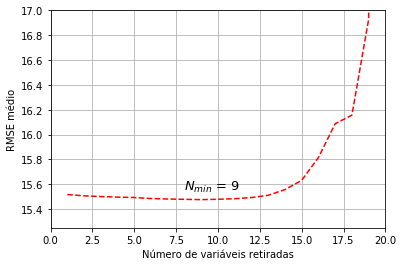

In [317]:
n = [x for x in range(1,21)]
plt.plot(n,min_rmse_values,'r--')
plt.xlabel('Número de variáveis retiradas')
plt.ylabel('RMSE médio')
plt.text(8, 15.55, '$N_{min}$ = 9', fontsize=13)
plt.axis([0, 20, 15.25, 17])
plt.grid(True)
plt.show()

In [ ]:
best_data_wrapper = data_wrapper.copy()
best_data_wrapper = best_data_wrapper.drop(2, axis=1)
best_data_wrapper.insert(loc=0, column=0, value=1)
#best_data_wrapper_b = best_data_wrapper.insert(loc=0, column=0, value=1)
best_data_wrapper
